# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [237]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [238]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url) 
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = (city_weather["main"]["temp_max"])
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | nchelenge
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kimbe
Processing Record 9 of Set 1 | al jawf
Processing Record 10 of Set 1 | bada
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | morton
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | belyy yar
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | darwin
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | palmer
Processing Record 23 of

In [239]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [240]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,284.59,79,28,2.58,NZ,1686620685
1,nchelenge,-9.3451,28.7340,291.92,60,28,2.38,ZM,1686620685
2,tazovsky,67.4667,78.7000,273.96,93,100,8.12,RU,1686620685
3,mount gambier,-37.8333,140.7667,285.07,82,100,4.88,AU,1686620685
4,olonkinbyen,70.9221,-8.7187,275.20,87,100,8.86,SJ,1686620686


In [241]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [242]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,284.59,79,28,2.58,NZ,1686620685
1,nchelenge,-9.3451,28.7340,291.92,60,28,2.38,ZM,1686620685
2,tazovsky,67.4667,78.7000,273.96,93,100,8.12,RU,1686620685
3,mount gambier,-37.8333,140.7667,285.07,82,100,4.88,AU,1686620685
4,olonkinbyen,70.9221,-8.7187,275.20,87,100,8.86,SJ,1686620686


### Create the Scatter Plots Requested

### Latitude Vs. Temperature

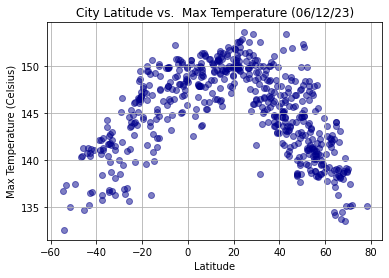

In [243]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],((city_data_df['Max Temp']-32)/1.8), 
            color="darkblue", alpha=.50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title("City Latitude vs.  Max Temperature (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

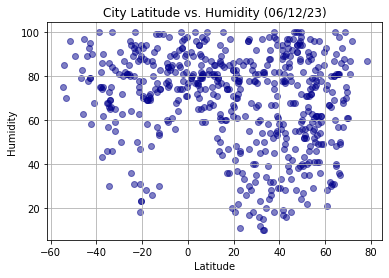

In [244]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], 
            color="darkblue", alpha=.50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

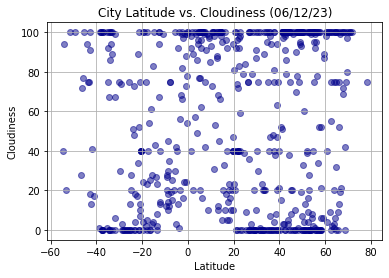

In [245]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], 
            color="darkblue", alpha=.50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

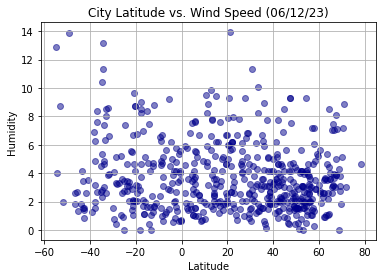

In [246]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], 
            color="darkblue", alpha=.50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [247]:
def genLinRegr(df,gx_col,gy_col):
    (slope, intercept,rvalue, pvalue, stderr)=linregress(df[gx_col],df[gy_col])
    regress_values=df[gx_col]* slope + intercept
    line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    print (f'R-Value is: {rvalue}')

    plt.scatter(df[gx_col],df[gy_col],color="darkblue", alpha=.50)
    plt.plot(df[gx_col], regress_values, color='red')
    plt.grid()
    plt.annotate(line_eq, xy=(50, 50), xycoords='figure pixels', horizontalalignment='left', verticalalignment='top', color="red")
    plt.xlabel(str(gx_col))
    plt.ylabel(str(gy_col))
    plt.title(f'{str(gx_col)} vs {str(gy_col)} Linear Regression')
  


In [248]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tazovsky,67.4667,78.7000,273.96,93,100,8.12,RU,1686620685
4,olonkinbyen,70.9221,-8.7187,275.20,87,100,8.86,SJ,1686620686
5,anadyr,64.7500,177.4833,290.43,48,0,4.00,RU,1686620686
8,al jawf,29.5000,38.7500,297.32,32,0,2.55,SA,1686620686
9,bada,51.3920,109.8717,296.52,52,100,1.47,RU,1686620687


In [249]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,284.59,79,28,2.58,NZ,1686620685
1,nchelenge,-9.3451,28.7340,291.92,60,28,2.38,ZM,1686620685
3,mount gambier,-37.8333,140.7667,285.07,82,100,4.88,AU,1686620685
6,adamstown,-25.0660,-130.1015,293.56,64,28,3.45,PN,1686620686
7,kimbe,-5.5502,150.1429,306.05,56,30,1.48,PG,1686620686


###  Temperature vs. Latitude Linear Regression Plot

R-Value is: -0.7550176896748588


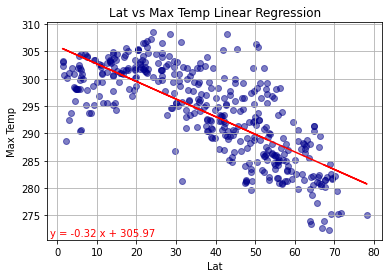

In [250]:
# Linear regression on Northern Hemisphere
genLinRegr(northern_hemi_df,'Lat','Max Temp')

R-Value is: 0.7762342527923043


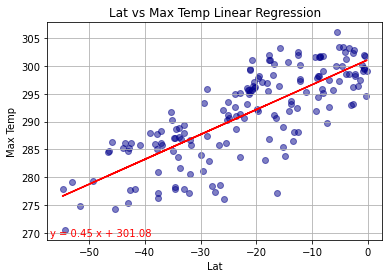

In [251]:
# Linear regression on Southern Hemisphere
genLinRegr(southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:**
There is a trend seen that Temperature spike in equator -- which is true -- and fall down when latitude goes upper and lower than 0.
The first graph has a negative linear correlation and southern_df graph has strong correlation. 

### Humidity vs. Latitude Linear Regression Plot

R-Value is: -0.11036982610880702


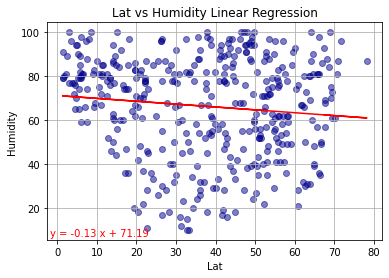

In [252]:
# Northern Hemisphere
genLinRegr(northern_hemi_df,'Lat','Humidity')

R-Value is: 0.07101272312816341


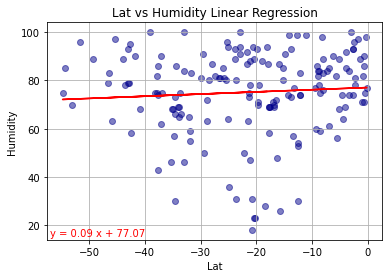

In [253]:
# Southern Hemisphere
genLinRegr(southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** 
There was in imbalance in sample on both data frame. Northern latitude dataframe has more sample than southern but it totally make sense just by looking at the map or globe. There is more land mass in northern countries than southern countries. 
Southern Pearson's Correlation coefficient is still considered strong.

### Cloudiness vs. Latitude Linear Regression Plot

R-Value is: -0.10003390989837918


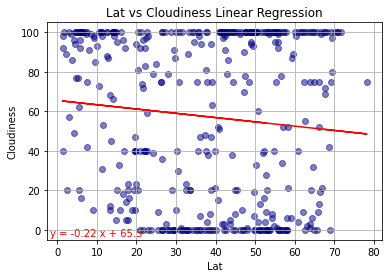

In [254]:
# Northern Hemisphere
genLinRegr(northern_hemi_df,'Lat','Cloudiness')

R-Value is: -0.05307484811375895


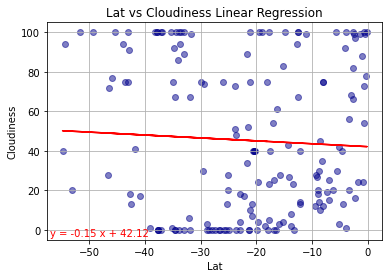

In [255]:
# Southern Hemisphere
genLinRegr(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:**
Correlation on both data sets are weak. They both have negative linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

R-Value is: -0.11048579743016507


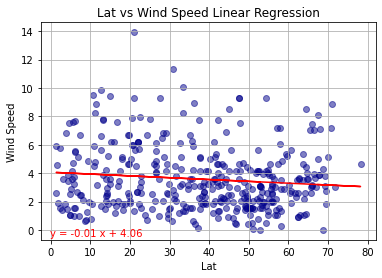

In [256]:
# Northern Hemisphere
genLinRegr(northern_hemi_df,'Lat','Wind Speed')

R-Value is: -0.17953725310131038


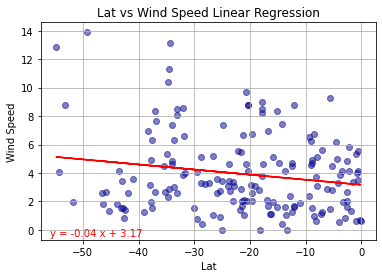

In [257]:
# Southern Hemisphere
genLinRegr(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:**
Correlation on both data sets are weak. They both have negative linear relationship.
